In [1]:
%matplotlib inline
# ---- settings ----
import json
Settings = json.load(open('../settings.txt'))
print('\n')
# ------------------
import matplotlib.pyplot as plt
import sys
from time import time
import cv2
import numpy as np
from os.path import join, isdir
sys.path.append('./../../easy_multi_person_pose_estimation')
sys.path.insert(0,'../')
import mvpose.data.transform as tfm

root = join(Settings['data_root'], 'pak')

from poseestimation import model
pe = model.PoseEstimator()

/home/julian/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## UMPM

In [2]:
from pak.datasets.UMPM import UMPM
user = Settings['UMPM']['username']
pwd = Settings['UMPM']['password']

X, Y, Calib = tfm.get_from_umpm(root, 'p2_free_1', user, pwd)

first_video = X[0][0:1]
print(first_video.shape)

_start = time()
positions = pe.predict(first_video)
_end = time(); print('elapsed:', _end - _start)

UMPM
(1, 486, 644, 3)
elapsed: 84.27132868766785


(14, 2)
(14, 2)


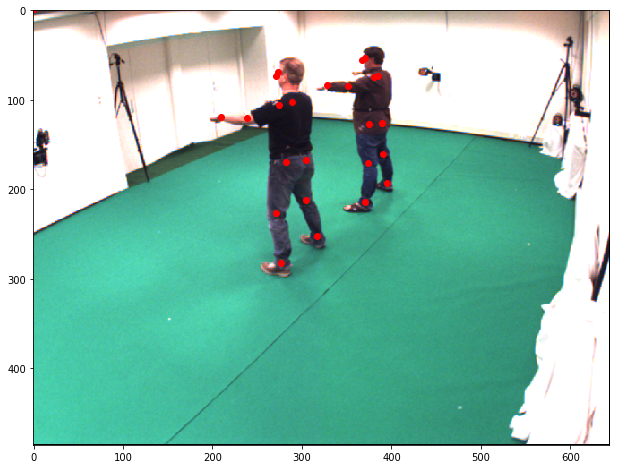

In [3]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)

positions = tfm.transform_from_openpose(positions)
positions_frame0 = positions[0]
for k in positions_frame0:
    print(k.shape)
    for x,y in k:
        ax.scatter(y,x, color='red')

ax.imshow(X[0][0])
plt.show()